<a href="https://colab.research.google.com/github/Madina069/Python_homework/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from nltk import download
download('punkt')
download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from pymystem3 import Mystem
mystem = Mystem()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


In [ ]:
data = pd.read_csv("/content/elegies.csv")

In [ ]:
data.head()

,id,text,author,year,title
0,343,С дерев на поздний злак полей\nЛисты поблеклые...,Туманский В.И.,1823,Падение листьев
1,488,Только дружба обещает\nМне бессмертия венок;\n...,Батюшков К.Н.,1817,К Г***чу
2,298,Волшебница! твой ненавистен дар!\nТы мертвеца ...,[Н.К.],1822,Коринне
3,323,"Мечты, мечты!\nГде ваша сладость?\nГде ты - гд...",Пушкин А.С.,1831,Элегия
4,14,Лишь сумраком оденутся поля\nИ неба свод покаж...,[А. Сырох-въ],1820,Елегии жителя берегов Чернаго моря


In [ ]:
def preprocess(text):
  return ' '.join([i for i in mystem.lemmatize(text) if i[0].isalpha() and i not in stop_words])

In [ ]:
data["lemmatized"] = data["text"].apply(preprocess)

In [ ]:
data.head()

,id,text,author,year,title,lemmatized
0,343,С дерев на поздний злак полей\nЛисты поблеклые...,Туманский В.И.,1823,Падение листьев,с дерево на поздний злак поле лист поблеклый о...
1,488,Только дружба обещает\nМне бессмертия венок;\n...,Батюшков К.Н.,1817,К Г***чу,только дружба обещать я бессмертие венок он пр...
2,298,Волшебница! твой ненавистен дар!\nТы мертвеца ...,[Н.К.],1822,Коринне,волшебница твой ненавистный дар ты мертвец к с...
3,323,"Мечты, мечты!\nГде ваша сладость?\nГде ты - гд...",Пушкин А.С.,1831,Элегия,мечта мечта где ваш сладость где ты где ты ноч...
4,14,Лишь сумраком оденутся поля\nИ неба свод покаж...,[А. Сырох-въ],1820,Елегии жителя берегов Чернаго моря,лишь сумрак одеваться поле и небо свод показыв...


In [ ]:
data.isnull().values.any()

False

In [ ]:
X = data["text"]

**K-means and DBSCAN with CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [ ]:
vectorizer.fit(X)

CountVectorizer()

In [ ]:
X_cv = vectorizer.transform(X)

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples, homogeneity_completeness_v_measure

In [ ]:
num_clusters = [20,30,40]

for i in num_clusters:

    kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42).fit(X_cv)
    silhouette_avg = silhouette_score(X_cv, kmeans.labels_)
    print("For n_clusters=", i,
          "silhouette score=", silhouette_avg)

For n_clusters= 20 silhouette score= 0.09980634031319208
For n_clusters= 30 silhouette score= 0.05268211788591908
For n_clusters= 40 silhouette score= 0.035417797008295955


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cv.toarray())

In [ ]:
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X_pca, clusters)
            print(f"For min_samples={samples}, eps={e}:")
            print(f"Estimated number of clusters: {n_clusters}")
            print(f"Silhouette score: {silhouette_avg:.4f}")
        else:
            print(f"For min_samples={samples}, eps={e}:")
            print("Estimated number of clusters: 1 (or all noise points)")
            print("Silhouette score: not applicable (only one cluster or all points are noise)")

For min_samples=1, eps=0.1:
Estimated number of clusters: 460
Silhouette score: 0.1033
For min_samples=1, eps=2:
Estimated number of clusters: 30
Silhouette score: 0.0396
For min_samples=5, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=5, eps=2:
Estimated number of clusters: 2
Silhouette score: 0.5586
For min_samples=40, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=40, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)


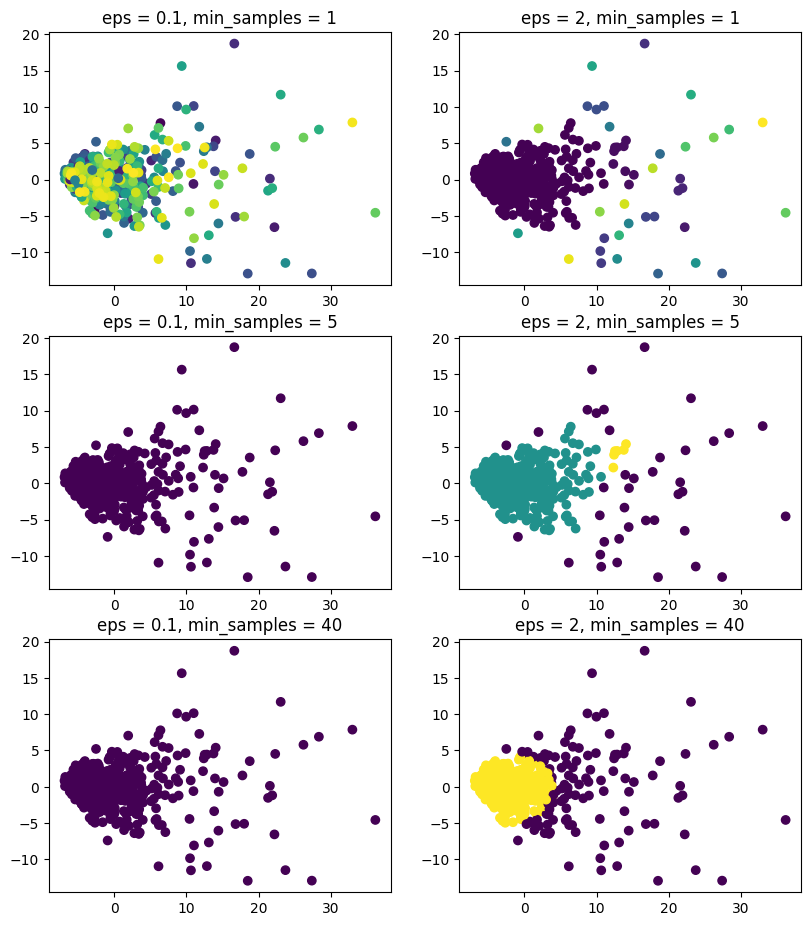

In [ ]:
plt.figure(figsize= (15,23))
i = 1
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(6, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

**K-Means and DBSCAN with TfidfVerctorizer** *Курс

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [ ]:
tf_idf.fit(X)

TfidfVectorizer()

In [ ]:
X = tf_idf.transform(X)

In [ ]:
num_clusters = [20,30,40]

for i in num_clusters:

    kmeans = KMeans(n_clusters=i, n_init = 10, random_state=42).fit(X)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    print("For n_clusters=", i,
          "silhouette score=", silhouette_avg)

For n_clusters= 20 silhouette score= 0.005373796245349937
For n_clusters= 30 silhouette score= 0.0063214876822444265
For n_clusters= 40 silhouette score= 0.010912677288664942


In [ ]:
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        if n_clusters > 1:
            silhouette_avg = silhouette_score(X, clusters)
            print(f"For min_samples={samples}, eps={e}:")
            print(f"Estimated number of clusters: {n_clusters}")
            print(f"Silhouette score: {silhouette_avg:.4f}")
        else:
            print(f"For min_samples={samples}, eps={e}:")
            print("Estimated number of clusters: 1 (or all noise points)")
            print("Silhouette score: not applicable (only one cluster or all points are noise)")

For min_samples=1, eps=0.1:
Estimated number of clusters: 506
Silhouette score: 0.0115
For min_samples=1, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=5, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=5, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=40, eps=0.1:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)
For min_samples=40, eps=2:
Estimated number of clusters: 1 (or all noise points)
Silhouette score: not applicable (only one cluster or all points are noise)


ValueError: 'c' argument has 509 elements, which is inconsistent with 'x' and 'y' with size 1.

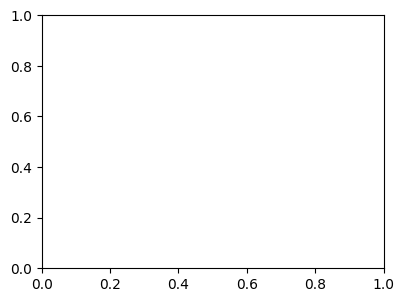

In [ ]:
plt.figure(figsize= (15,23))
i = 1
for samples in [1, 5, 40]:
    for e in [0.1, 2]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['text'],
                                                    data['year'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_train_new = vectorizer.transform(X_train)
X_test_new = vectorizer.transform(X_test)

In [ ]:
X_train_new

<407x22256 sparse matrix of type '<class 'numpy.int64'>'
	with 68885 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['year'])

In [ ]:
num_clusters = len(set(y_encoded))  # Количество уникальных значений года публикации
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(X_cv)

KMeans(n_clusters=21, n_init=10, random_state=42)

In [ ]:
kmeans_preds = kmeans.predict(X_test_new)

In [ ]:
print(homogeneity_completeness_v_measure(y_encoded, kmeans.labels_))

(0.07899579937453055, 0.17091998981944026, 0.10805208641214607)


In [ ]:
scaler = StandardScaler()
y_c = scaler.fit_transform(np.array(data['year']).reshape(-1,1))

In [ ]:
num_clusters = len(np.unique(y_c))  # Количество уникальных значений года публикации
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
kmeans.fit(X_train_new)

KMeans(n_clusters=21, n_init=10, random_state=42)

In [ ]:
kmeans_preds = kmeans.predict(X_test_new)

In [ ]:
print(homogeneity_completeness_v_measure(y_c, clusters))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


ValueError: labels_true must be 1D: shape is (509, 1)

In [ ]:
silhouette_score(X_pca, kmeans.labels_)

ValueError: Found input variables with inconsistent numbers of samples: [509, 407]

In [ ]:
samples_silhouettes = silhouette_samples(X_cv, kmeans.labels_)
sorted(samples_silhouettes[kmeans.labels_ == 0], reverse=True)

[-0.04786299546973186,
 -0.0550414261862138,
 -0.05841079224513403,
 -0.06288249457387506,
 -0.06395530818810531,
 -0.08248304088841169,
 -0.09659734835529546,
 -0.10155665699839955,
 -0.10862140879858197,
 -0.11631939662559014,
 -0.11993201317508258,
 -0.12085099280407809,
 -0.13818662040735827,
 -0.14762533351014434,
 -0.1478634790191575,
 -0.15010917506584362,
 -0.1513817871799296,
 -0.15229674588407366,
 -0.15827451586695715,
 -0.16110381019430128,
 -0.16669594849062078,
 -0.1776427991918225,
 -0.18017756851626773,
 -0.1838338337515992,
 -0.2035809891093542,
 -0.22328814490170482,
 -0.2385908203083913,
 -0.23923784448184812,
 -0.24587056295936421,
 -0.2568453933962198]

In [ ]:
def plot_silhouettes(samples_silhouettes, labels, n_clusters, silhouette_avg):
  fig, ax = plt.subplots()
  y_lower = 10

  for i in range(n_clusters):
      ith_cluster_silhouette_values = samples_silhouettes[labels == i]
      ith_cluster_silhouette_values.sort()
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i


      ax.fill_betweenx(np.arange(y_lower,y_upper),
                      0,
                      ith_cluster_silhouette_values,
                      alpha=0.3)

      #label the silhouse plots with their cluster numbers at the middle
      ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      #compute the new y_lower for next plot
      y_lower = y_upper +10

  ax.set_title("Silhuoette plot")
  ax.set_xlabel("silhouette score")
  ax.set_ylabel("Cluster label")

  #the vertical line for average silhouette score of all the values
  ax.axvline(x=silhouette_avg, color="red", linestyle="--")

  ax.set_yticks([])
  ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

  plt.show()

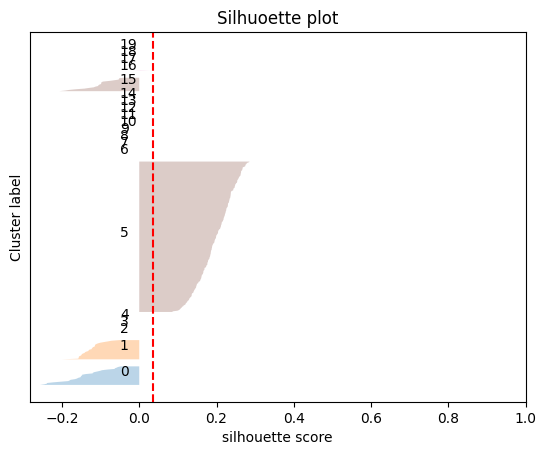

In [ ]:
plot_silhouettes(samples_silhouettes, kmeans.labels_, 20, silhouette_avg)

In [ ]:
kmeans_20 = KMeans(n_clusters=3, random_state=42).fit(X_train_new)
kmeans_40 = KMeans(n_clusters=7, random_state=42).fit(X_train_new)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
samples_silhouettes_20 = silhouette_samples(X_train_new, kmeans_20.labels_)
silhouette_avg_20 = silhouette_score(X_train_new, kmeans_20.labels_)

In [ ]:
samples_silhouettes_40 = silhouette_samples(X_train_new, kmeans_40.labels_)
silhouette_avg_40 = silhouette_score(X_train_new, kmeans_40.labels_)

In [ ]:
print(silhouette_avg, silhouette_avg_20, silhouette_avg_40)

0.010912677288664942 0.0034924619980691647 0.0017451016758542248


In [ ]:
kmeans_10 = KMeans(n_clusters=10, random_state=0).fit(X_train_new)
samples_silhouettes_10 = silhouette_samples(X_train_new, kmeans_10.labels_)
silhouette_avg_10 = silhouette_score(X_train_new, kmeans_10.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **TSNE**

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
%%time
X_embedded = TSNE(n_components=2, init='random', perplexity=3).fit_transform(X)

CPU times: user 16.3 s, sys: 1.86 ms, total: 16.3 s
Wall time: 10.9 s


In [ ]:
X_embedded.shape

(509, 2)

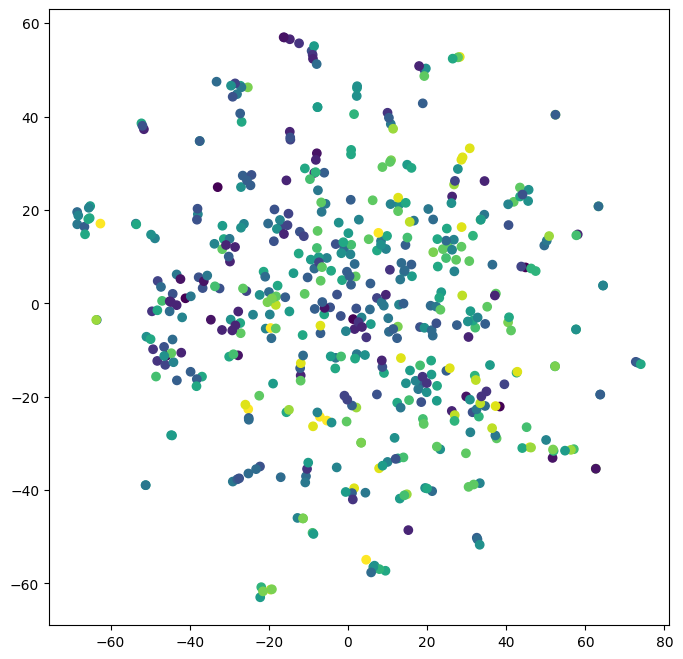

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

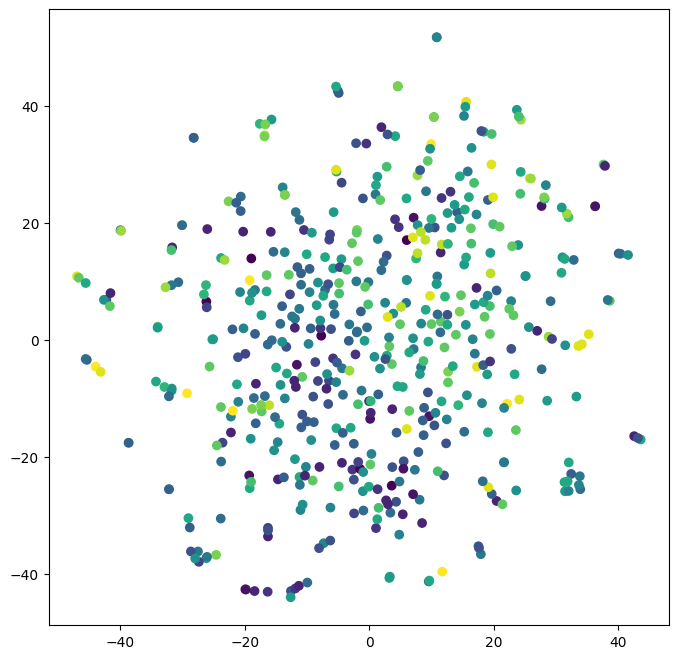

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=7).fit_transform(X)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

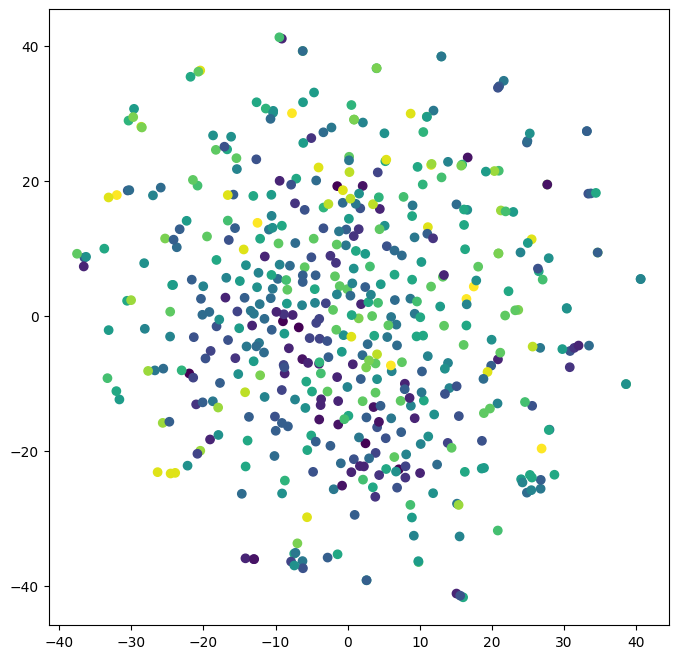

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=10).fit_transform(X)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

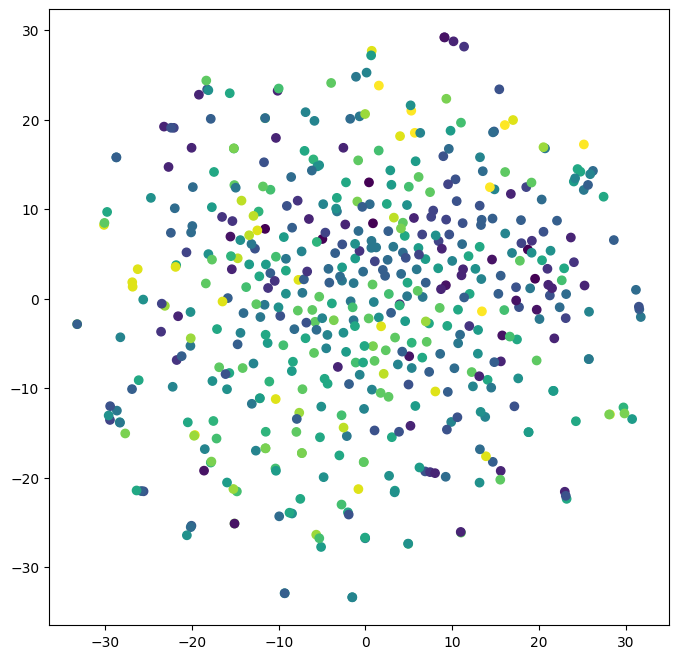

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=20).fit_transform(X)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

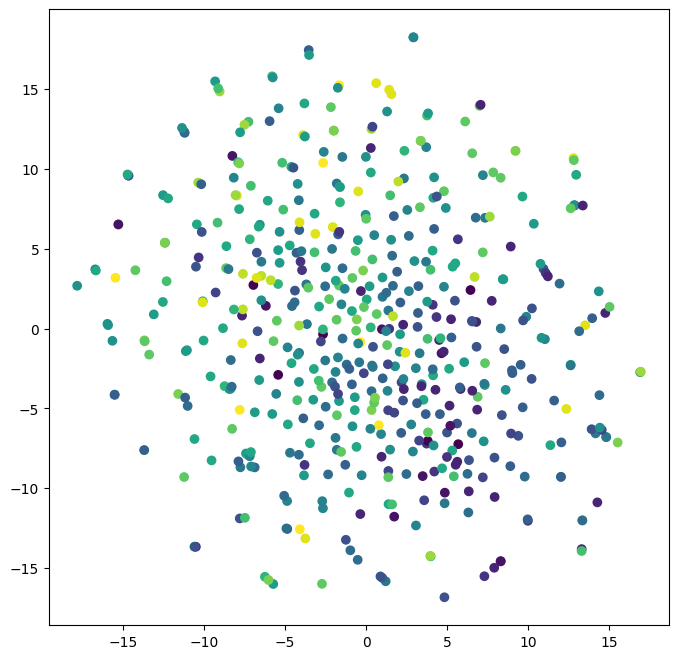

In [ ]:
X_embedded = TSNE(n_components=2, init='random', perplexity=30).fit_transform(X)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=data["year"])
plt.show()

# **LDA**

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

In [ ]:
lda = LatentDirichletAllocation(n_components=100)

lda.fit(X_train_new)

LatentDirichletAllocation(n_components=100)

In [ ]:
lda.components_.shape

(100, 22256)

In [ ]:
lda.perplexity(X_test_new)

6.746376727173913e+35

In [ ]:
lda.score(X_test_new)

-88384.49064835694

In [ ]:
lda = LatentDirichletAllocation(n_components=20)

lda.fit(X_train_new)

LatentDirichletAllocation(n_components=20)

In [ ]:
lda.perplexity(X_test_new)

28465412751153.97

In [ ]:
lda.score(X_test_new)

-33189.61330629104

In [ ]:
lda = LatentDirichletAllocation(n_components=200)
lda.fit(X_train_new)

LatentDirichletAllocation(n_components=200)

In [ ]:
lda.perplexity(X_test_new)

3.0231351122274433e+55

In [ ]:
lda.score(X_test_new)

-136861.266606132

In [ ]:
top_features_ind = lda.components_[0].argsort()[:-20 -1:-1]

In [ ]:
tf_feature_names = tf_idf.get_feature_names_out()

top_features = [tf_feature_names[i] for i in top_features_ind]

In [ ]:
weights = lda.components_[0][top_features_ind]

In [ ]:
print(list(zip(top_features, weights)))

[('странника', 0.3774810522432212), ('пал', 0.2529459816894643), ('звуке', 0.23796104043270927), ('саул', 0.22981069669152354), ('саула', 0.22981069669152354), ('вождь', 0.2136762517859416), ('холма', 0.2104322269329238), ('вей', 0.20620859554855972), ('мертвый', 0.20025803406786394), ('полдень', 0.1993929855182531), ('боях', 0.19138830395506173), ('могильные', 0.18447104175607182), ('первенец', 0.1807088776353936), ('цель', 0.17477034078246204), ('щит', 0.1718055731519946), ('тихою', 0.1695263447585662), ('хладные', 0.1655165089268725), ('слеза', 0.1606146436994806), ('погибшего', 0.1604198768672835), ('ярой', 0.15487379778900634)]


In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, n_components, max_plots=7):

    fig, axes = plt.subplots(1, max_plots, figsize=(25, 10)) # параметры отображения
    axes = axes.flatten()
    all_features = {} # словарь для сохранения ключевых слов для тем


    for topic_idx, topic in enumerate(model.components_):
      if topic_idx < max_plots:
        top_features_ind = topic.argsort()[:-20 - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]

        # строка для сохранения темы и слов в словарь
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 13})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=14)


    plt.show()

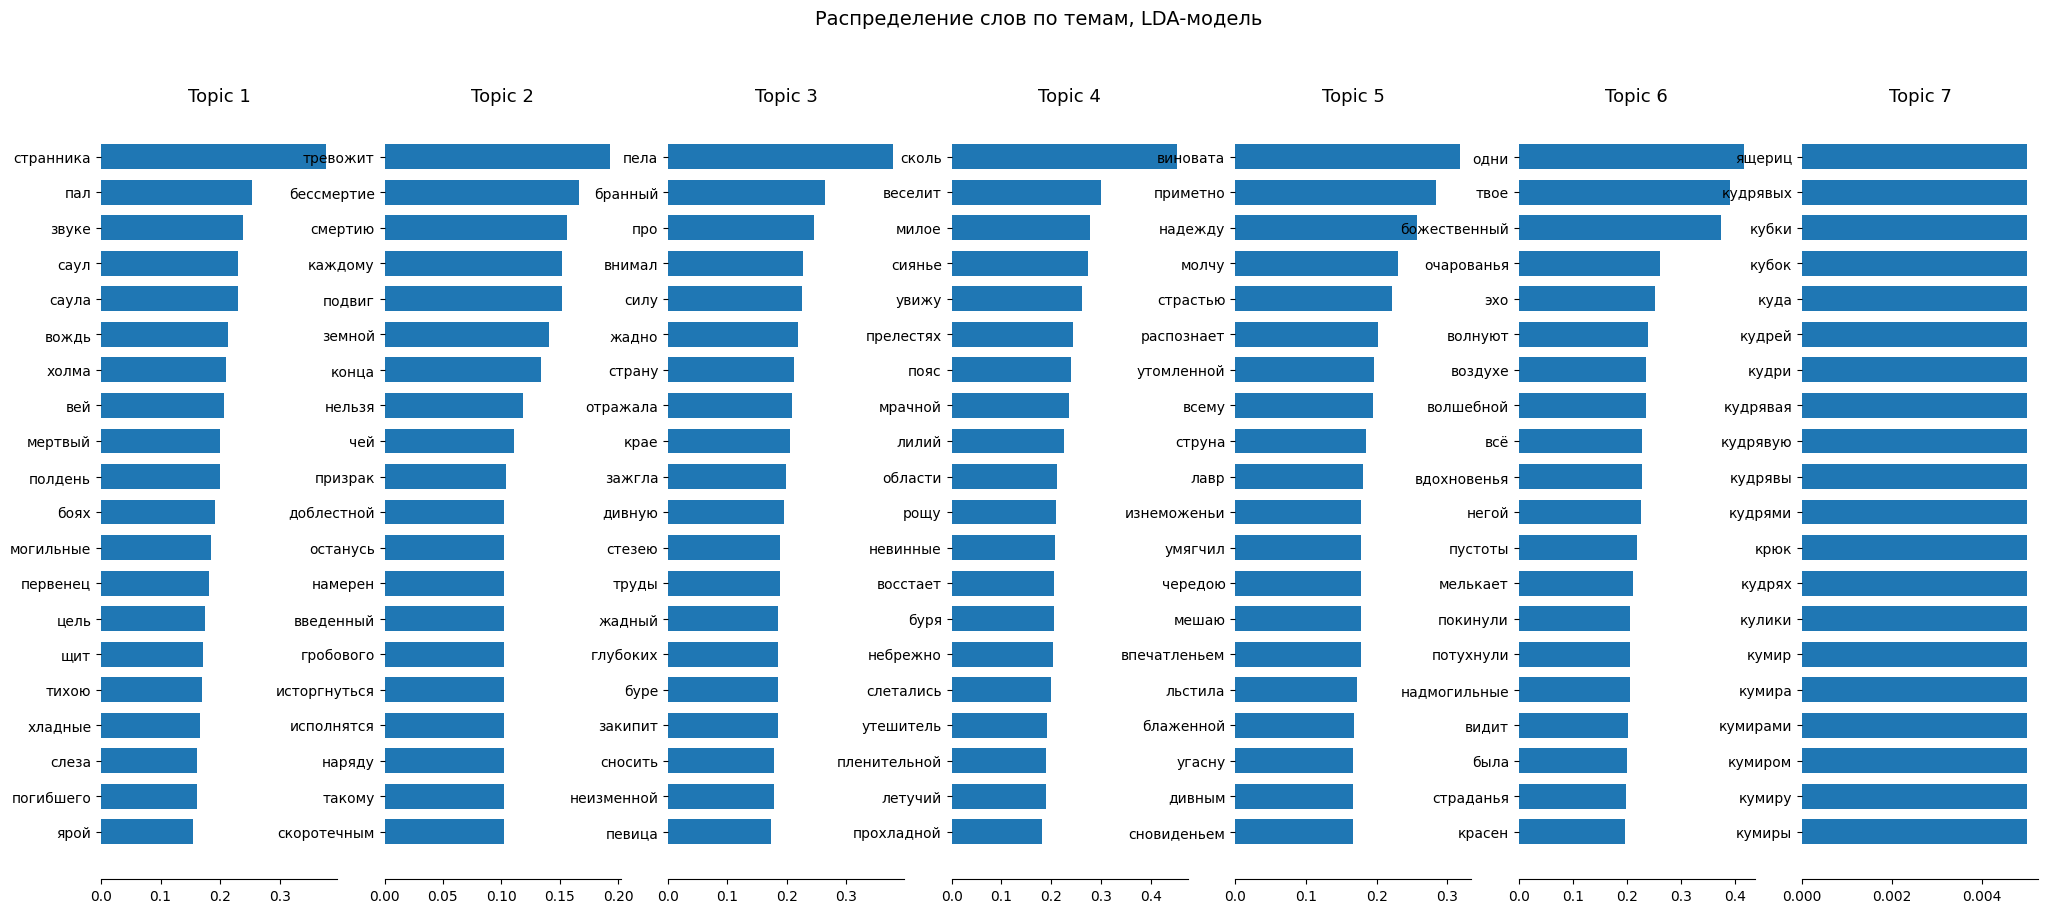

In [ ]:
plot_top_words(lda, tf_feature_names, 30, 'Распределение слов по темам, LDA-модель', n_components=7)

# Zadanie **2**

In [ ]:
df = pd.read_csv('/content/working_df_IA.csv')

In [ ]:
df.head()

,Slovoforma,lemma,part_of_speech,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA,IA_DWELL_TIME_%,IA_AVERAGE_FIX_PUPIL_SIZE,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_TIME,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_FIXATION_%,IA_REGRESSION_IN,IA_REGRESSION_OUT,IA_REGRESSION_PATH_DURATION,TRIAL_FIXATION_COUNT,sex,grade
0,клубни,клубень,S,6,2,2,0.0057,1338.0,106,9330,1,0.0130,0,0,106,77,m,3
1,снова,снова,ADV,5,2,5,0.0063,1006.0,108,14176,0,0.0130,0,0,108,77,f,2
2,собаки,собака,S,6,3,5,0.0034,1150.0,108,19886,1,0.0094,0,0,108,106,m,2
3,траве,трава,S,5,2,4,0.0123,1360.0,110,298,0,0.0312,1,0,476,32,f,3
4,шуба,шуба,S,4,2,3,0.0023,864.0,112,52850,1,0.0057,0,1,658,174,m,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5284 entries, 0 to 5283
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Slovoforma                   5284 non-null   object 
 1   lemma                        5284 non-null   object 
 2   part_of_speech               5284 non-null   object 
 3   letters_in_slovoforma        5284 non-null   int64  
 4   slogi_slovoforma             5284 non-null   int64  
 5   rang_frequency_NKRIA         5284 non-null   int64  
 6   IA_DWELL_TIME_%              5284 non-null   float64
 7   IA_AVERAGE_FIX_PUPIL_SIZE    5284 non-null   float64
 8   IA_FIRST_FIXATION_DURATION   5284 non-null   int64  
 9   IA_FIRST_FIXATION_TIME       5284 non-null   int64  
 10  IA_FIRST_FIX_PROGRESSIVE     5284 non-null   int64  
 11  IA_FIRST_RUN_FIXATION_%      5284 non-null   float64
 12  IA_REGRESSION_IN             5284 non-null   int64  
 13  IA_REGRESSION_OUT 

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [ ]:
set(list(df['part_of_speech']))

{'5', 'A', 'ADV', 'CON', 'NUM', 'P', 'PART', 'PR', 'S', 'V', 'VP'}

In [ ]:
df = df.drop(df[df['part_of_speech'] == '5'].index)

In [ ]:
set(list(df['part_of_speech']))

{'A', 'ADV', 'CON', 'NUM', 'P', 'PART', 'PR', 'S', 'V', 'VP'}

In [ ]:
enc = OneHotEncoder()

In [ ]:
X_cat_encoded = enc.fit_transform(df[['part_of_speech']])

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_to_scale = df[['letters_in_slovoforma', 'slogi_slovoforma', 'rang_frequency_NKRIA']]

In [ ]:
X_scaled = scaler.fit_transform(X_to_scale)

In [ ]:
X_scaled.shape

(5235, 3)

In [ ]:
X_cat_encoded.shape

(5235, 10)

In [ ]:
type(X_scaled)

numpy.ndarray

In [ ]:
type(X_cat_encoded)

scipy.sparse._csr.csr_matrix

In [ ]:
X = np.concatenate([X_cat_encoded.todense(), X_scaled], axis=1)

In [ ]:
X = np.asarray(X)

In [ ]:
X_train_IA, X_test_IA, y_train_IA, y_test_IA = train_test_split(X,
                                                    df['IA_DWELL_TIME_%'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [ ]:
knn.fit(X_train_IA, np.array(y_train_IA))

KNeighborsRegressor()

In [ ]:
y_IA_pred_knn = knn.predict(np.array(X_test_IA))

In [ ]:
print("R squared: %.2f" % r2_score(y_test_IA, y_IA_pred_knn))
print("Mean squared error: %.2f" % mean_squared_error(y_test_IA, y_IA_pred_knn))
print('MAE: %.2f' % mean_absolute_error(y_test_IA, y_IA_pred_knn))

R squared: 0.30
Mean squared error: 0.00
MAE: 0.01


In [ ]:
lasso = Lasso()

In [ ]:
lasso.fit(X_train_IA, y_train_IA)

Lasso()

In [ ]:
lasso_pred = lasso.predict(X_test_IA)

In [ ]:
def get_scores(y_test, y_pred):
  print('R^2: %.2f' % r2_score(y_test, y_pred))
  print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
  print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))

In [ ]:
get_scores(y_test_IA, lasso_pred)

R^2: -0.00
MSE: 0.00
MAE: 0.02


In [ ]:
ridge = Ridge()

In [ ]:
ridge.fit(X_train_IA, y_train_IA)
ridge_pred = ridge.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, ridge_pred)

R^2: 0.20
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [ ]:
model = BaggingRegressor(estimator=LinearRegression(), n_jobs=-1, n_estimators=100)

In [ ]:
y_train_IA.shape

(4188,)

In [ ]:
model.fit(X_train_IA, y_train_IA)

BaggingRegressor(estimator=LinearRegression(), n_estimators=100, n_jobs=-1)

In [ ]:
bagg_preds = model.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, bagg_preds)

R^2: 0.20
MSE: 0.00
MAE: 0.01


In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train_IA, y_train_IA)

RandomForestRegressor()

In [ ]:
rf_preds = rf.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, rf_preds)

R^2: 0.37
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=0, verbose=10, n_iter_no_change=10)

In [ ]:
gbr.fit(X_train_IA, y_train_IA)

      Iter       Train Loss   Remaining Time 
         1           0.0006            0.33s
         2           0.0005            0.36s
         3           0.0005            0.33s
         4           0.0005            0.30s
         5           0.0005            0.29s
         6           0.0005            0.28s
         7           0.0005            0.27s
         8           0.0005            0.26s
         9           0.0005            0.25s
        10           0.0005            0.25s
        11           0.0005            0.24s


GradientBoostingRegressor(n_iter_no_change=10, random_state=0, verbose=10)

In [ ]:
gbr_preds = gbr.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, gbr_preds)

R^2: 0.19
MSE: 0.00
MAE: 0.01


In [ ]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor


In [ ]:
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=10))]

In [ ]:
final_estimator = GradientBoostingRegressor(n_estimators=25, random_state=42, verbose=10, n_iter_no_change=10)
reg = StackingRegressor(estimators=estimators, final_estimator=final_estimator)

In [ ]:
reg.fit(X_train_IA, y_train_IA)

      Iter       Train Loss   Remaining Time 
         1           0.0005            0.09s
         2           0.0005            0.11s
         3           0.0005            0.10s
         4           0.0005            0.10s
         5           0.0004            0.10s
         6           0.0004            0.09s
         7           0.0004            0.09s
         8           0.0004            0.09s
         9           0.0004            0.08s
        10           0.0004            0.08s
        11           0.0004            0.07s


StackingRegressor(estimators=[('ridge', RidgeCV()),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr', KNeighborsRegressor(n_neighbors=10))],
                  final_estimator=GradientBoostingRegressor(n_estimators=25,
                                                            n_iter_no_change=10,
                                                            random_state=42,
                                                            verbose=10))

In [ ]:
reg_preds = reg.predict(X_test_IA)

In [ ]:
get_scores(y_test_IA, reg_preds)

R^2: 0.31
MSE: 0.00
MAE: 0.01


## **Zadanie 2.2**

In [ ]:
import re

X = [column for column in df.columns if re.match(r'IA_', column)]

X.append('TRIAL_FIXATION_COUNT')

X = df[X]

In [ ]:
df.head()

,Slovoforma,lemma,part_of_speech,letters_in_slovoforma,slogi_slovoforma,rang_frequency_NKRIA,IA_DWELL_TIME_%,IA_AVERAGE_FIX_PUPIL_SIZE,IA_FIRST_FIXATION_DURATION,IA_FIRST_FIXATION_TIME,IA_FIRST_FIX_PROGRESSIVE,IA_FIRST_RUN_FIXATION_%,IA_REGRESSION_IN,IA_REGRESSION_OUT,IA_REGRESSION_PATH_DURATION,TRIAL_FIXATION_COUNT,sex,grade
0,клубни,клубень,S,6,2,2,0.0057,1338.0,106,9330,1,0.0130,0,0,106,77,m,3
1,снова,снова,ADV,5,2,5,0.0063,1006.0,108,14176,0,0.0130,0,0,108,77,f,2
2,собаки,собака,S,6,3,5,0.0034,1150.0,108,19886,1,0.0094,0,0,108,106,m,2
3,траве,трава,S,5,2,4,0.0123,1360.0,110,298,0,0.0312,1,0,476,32,f,3
4,шуба,шуба,S,4,2,3,0.0023,864.0,112,52850,1,0.0057,0,1,658,174,m,2


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5235 entries, 0 to 5283
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IA_DWELL_TIME_%              5235 non-null   float64
 1   IA_AVERAGE_FIX_PUPIL_SIZE    5235 non-null   float64
 2   IA_FIRST_FIXATION_DURATION   5235 non-null   int64  
 3   IA_FIRST_FIXATION_TIME       5235 non-null   int64  
 4   IA_FIRST_FIX_PROGRESSIVE     5235 non-null   int64  
 5   IA_FIRST_RUN_FIXATION_%      5235 non-null   float64
 6   IA_REGRESSION_IN             5235 non-null   int64  
 7   IA_REGRESSION_OUT            5235 non-null   int64  
 8   IA_REGRESSION_PATH_DURATION  5235 non-null   int64  
 9   TRIAL_FIXATION_COUNT         5235 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 449.9 KB


In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
scaler.get_feature_names_out(X_scaled)

array(['IA_DWELL_TIME_%', 'IA_AVERAGE_FIX_PUPIL_SIZE',
       'IA_FIRST_FIXATION_DURATION', 'IA_FIRST_FIXATION_TIME',
       'IA_FIRST_FIX_PROGRESSIVE', 'IA_FIRST_RUN_FIXATION_%',
       'IA_REGRESSION_IN', 'IA_REGRESSION_OUT',
       'IA_REGRESSION_PATH_DURATION', 'TRIAL_FIXATION_COUNT'],
      dtype=object)

In [ ]:
X_scaled.get_feature_names_out()

AttributeError: 'numpy.ndarray' object has no attribute 'get_feature_names_out'

In [ ]:
X_scaled

array([[0.23076923, 0.25      , 0.25      ],
       [0.15384615, 0.25      , 1.        ],
       [0.23076923, 0.5       , 1.        ],
       ...,
       [1.        , 1.        , 0.25      ],
       [0.30769231, 0.25      , 0.25      ],
       [1.        , 1.        , 0.25      ]])

In [ ]:
df['sex'].shape

(5235,)

In [ ]:
X_train_IA_new, X_test_IA_new, y_train_IA_new, y_test_IA_new = train_test_split(X_scaled, df['sex'],
                                                    test_size=0.2,
                                                    random_state=42
                                                    )

In [ ]:
X_train_IA_new.shape
#X_test_IA_new.shape
#y_train_IA_new.shape
#y_test_IA_new.shape

(4188, 3)

In [ ]:
X_test_IA_new.shape

(1047, 3)

In [ ]:
y_train_IA_new.shape

(4188,)

In [ ]:
y_test_IA_new.shape

(1047,)

In [ ]:
#X_scaled_new = scaler.fit_transform(X_train_IA_new)

In [ ]:
#X_scaled_new.shape

(4188, 10)

In [ ]:
#X_scaled_new

array([[0.0433584 , 0.31638418, 0.19253731, ..., 0.        , 0.00415418,
        0.18611987],
       [0.05964912, 0.64526293, 0.27462687, ..., 0.        , 0.01036708,
        0.37223975],
       [0.0112782 , 0.26756628, 0.07910448, ..., 0.        , 0.25792695,
        0.91167192],
       ...,
       [0.25388471, 0.49215558, 0.25970149, ..., 0.        , 0.09330368,
        0.36277603],
       [0.22330827, 0.54935246, 0.7358209 , ..., 0.        , 0.31762954,
        0.64037855],
       [0.04461153, 0.22903086, 0.12089552, ..., 0.        , 0.00647023,
        0.25867508]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(y_train_IA_new)

LabelEncoder()

In [ ]:
le.classes_

array(['f', 'm'], dtype=object)

In [ ]:
y_train_IA_new = le.transform(y_train_IA_new)
y_test_IA_new = le.transform(y_test_IA_new)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=42, class_weight='balanced')

In [ ]:
clf.fit(X_train_IA_new, y_train_IA_new)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_pred_ = clf.predict(X_test_IA_new)

In [ ]:
print(classification_report(y_test_IA_new, y_test_pred_, target_names=le.classes_))

              precision    recall  f1-score   support

           f       0.68      0.53      0.60       708
           m       0.33      0.47      0.39       339

    accuracy                           0.51      1047
   macro avg       0.50      0.50      0.49      1047
weighted avg       0.56      0.51      0.53      1047



In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nb = MultinomialNB()

In [ ]:
nb.fit(X_scaled_new, y_train_IA_new)

MultinomialNB()

In [ ]:
y_test_pred_nb = nb.predict(X_test_IA_new)